In [1]:
import sys
sys.path.append(r"C:\Users\afeki\Desktop\code\CrossValidatedFeatureSelection\experiments")  # path contains python_file.py
from plot_utils import plot_fi_interaction, get_data, metrics_to_df, get_regular_paths
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
folder = "C:/Users/afeki/Desktop/code/CrossValidatedFeatureSelection/experiments/gbm_regression/interaction_simulation_catboost_debug/k_50_sigma_5_x1_num_for_paper_k_200_sigma_20_nrows100/"
# plot_fi_interaction(folder)

In [3]:
normalize = True
paths = get_regular_paths(one_hot=False)
metrics, feature_importances = [], []

for model, model_path in paths.items():
    for a in range(11):
        try:
            temp_fi, temp_metrics = get_data(model, F"{folder}/{model_path}_{a}_", normalize)
            temp_metrics = metrics_to_df(temp_metrics, model)
            temp_fi['a'] = a
            temp_metrics['a'] = a
            temp_fi['model'] = model
            metrics.append(temp_metrics)
            feature_importances.append(temp_fi)
        except:
            continue

metrics = pd.concat(metrics)
feature_importances = pd.concat(feature_importances)

In [4]:
feature_importances.head()

,index,fi_type,fi_value,exp_number,model,a
0,X1,gain,0.194784,0,LGBM,0
1,X2,gain,0.805216,0,LGBM,0
2,X1,permutation_test,0.000000,0,LGBM,0
3,X2,permutation_test,1.000000,0,LGBM,0
4,X1,permutation_train,0.135460,0,LGBM,0


In [5]:
def translate_value_names(df):
    df_map = { 'gain': 'Gain', 'permutation_test' : "Permutation", 'permutation_train' : 'Permutation Train', 'shap_test': 'Shap','shap_train': 'Shap Train'}
    model_map = {'LGBM' : 'LGBM', 'CATBOOST' : 'CatBoost', 'Ours' : 'Ours', 'Vanilla_GBM' : 'Vanilla GBM', 'SKLEARN_MI' : 'Scikit-Learn Mean Imputing','XGBOOST_MI' : 'XGBoost Mean Imputing'}
    df['fi_type'] = df['fi_type'].map(df_map)
    df['model'] = df['model'].map(model_map)
    
x2_feature_importances = feature_importances[(feature_importances['index'] == 'X2')]    
translate_value_names(x2_feature_importances) 
x2_feature_importances.head(2)

C:\Users\afeki\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\afeki\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,index,fi_type,fi_value,exp_number,model,a
1,X2,Gain,0.805216,0,LGBM,0
3,X2,Permutation,1.000000,0,LGBM,0


In [9]:
plot_data = x2_feature_importances[(x2_feature_importances.fi_type == "Permutation") & (x2_feature_importances.model.isin(['LGBM', 'CatBoost', 'Ours', 'Vanilla GBM']))]
plot_data = plot_data.groupby(['model', 'a'])['fi_value'].mean().to_frame().reset_index()


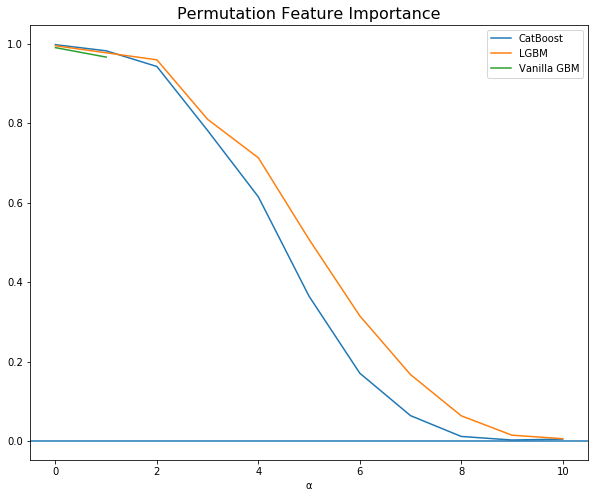

In [11]:
plt.figure(figsize=(10, 8))
ax = sns.lineplot(x="a", y="fi_value", hue="model", data=plot_data)
title = "Permutation Feature Importance"
ax.set_title(title, fontsize = 16)
# ax.set_xticks(np.arange(0,11))
ax.set_xlabel('\u03B1')
ax.set_ylabel('')
handles, labels = ax.get_legend_handles_labels()
ax.legend_.remove()  
ax.legend(handles=handles[1:], labels=labels[1:])
ax.axhline(0)
ax.figure.savefig(f"Reliably detect Permutation Feature Importance.png")
# ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

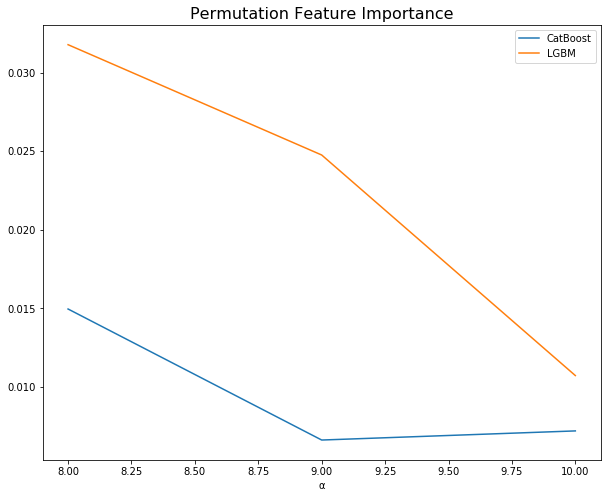

In [8]:
plt.figure(figsize=(10, 8))
ax = sns.lineplot(x="a", y="fi_value", hue="model", data=plot_data.query('a >= 8'))
title = "Permutation Feature Importance"
ax.set_title(title, fontsize = 16)
# ax.set_xticks(np.arange(0,11))
ax.set_xlabel('\u03B1')
ax.set_ylabel('')
handles, labels = ax.get_legend_handles_labels()
ax.legend_.remove()  
ax.legend(handles=handles[1:], labels=labels[1:])
ax.figure.savefig(f"Reliably detect Permutation Feature Importance.png")
# ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()